医療保険データ分析プロジェクトの紹介
医療費がますます増加する中で、公衆衛生の重要性が強調される今日、医療保険の費用に影響を与える要因を深く理解することはこれまで以上に重要になっています。医療保険データには、人口統計的特徴から健康状態や生活習慣に至るまで、豊富な情報が含まれており、適切に分析することで深い洞察と価値をもたらすことができます。

本プロジェクトは、個人の特性と医療保険費用の複雑な関係性を探求し明らかにすることを目的としています。高度なデータ分析技術を活用し、生のデータのクレンジングや探索から始め、主要な影響要因の特定、さらには予測モデルの構築に取り組みます。

本プロジェクトの成果が、個人が自身の生活習慣や健康状態が保険費用にどのように影響するかをよりよく理解する助けとなるだけでなく、保険提供者や政策立案者にとっても堅実なデータ基盤を提供することを期待しています。これにより、費用の最適化、健康的な生活習慣の促進、市場の実際のニーズに合った保険商品の設計といった戦略的提案が可能となり、医療および保険業界の持続可能な発展に寄与することができるでしょう。

医療保険データ分析プロジェクトの具体的な目標
利用可能なデータ項目（age、gender、bmi、children、discount_eligib、region、expenses、premium）に基づき、本プロジェクトは以下の主要な目標に焦点を当てます：

人口統計および健康要因が保険費用に与える影響の分析：
年齢（age）：年齢と保険費用（expensesおよびpremium）との関係性を明らかにします。年齢の上昇に伴い費用は増加する傾向があるかを検証します。

性別（gender）：男女間で保険費用に有意な差があるかを分析します。

BMI（bmi）：体格指数（BMI）が保険費用に及ぼす影響を評価します。どのBMIグループが最も高い／低い費用を持つか、また費用が急増するBMIの閾値が存在するかを探ります。

子供の人数（children）：扶養家族（子供）の人数と保険費用の関係性を調査します。

地域（region）：地理的地域ごとの平均保険費用を比較し、高コストおよび低コスト地域を特定します。

「割引適格（discount_eligib）」の状態が実際の費用に与える影響の評価：
割引を受ける資格の有無が実際の費用（expenses）および保険料（premium）にどの程度影響するかを分析します。これにより、現在の割引ポリシーとその影響をより深く理解することが可能になります。

保険費用（expensesまたはpremium）の予測モデルの構築：
個人の特性（age、gender、bmi、children、discount_eligib、region）に基づき、保険費用（expensesまたはpremium、プロジェクトで決定する主要ターゲット変数に応じて）を予測する機械学習モデルを開発します。

モデルの予測精度を評価し、費用の見積もりや保険料の設定に役立てます。

インサイトと行動推奨の提案：
分析およびモデルから得られた発見を、わかりやすい洞察（インサイト）としてまとめます。

戦略的な推奨を以下の対象に対して行います：

個人向け：費用に影響を与える要因の理解を助け、保険料を削減するための生活習慣の改善を検討する支援。

保険提供者向け：価格設定ポリシーの調整、新たな保険商品の開発、主要リスク要因に基づくリスク管理戦略の改善提案。

政策立案者向け：公衆衛生プログラムやインセンティブの提案により、健康的な生活習慣を促進し、医療費負担の軽減を目指す支援。

In [23]:
import warnings
warnings.filterwarnings('ignore')

from warnings import filterwarnings
filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from matplotlib.colors import LinearSegmentedColormap

from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)

from sklearn.model_selection import (
    train_test_split, cross_validate, GridSearchCV,
    KFold, cross_val_score
)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

custom_palette = ["#B7D5D4", "#77878B", "#488286", "#305252"]
sns.set_palette(sns.color_palette(custom_palette))

In [24]:
data = pd.read_csv('./data/medical_insurance.csv')
data = pd.DataFrame(data)
data

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.900,0,yes,southwest,16884.920,168.849
1,18,male,33.800,1,no,southeast,1725.550,17.256
2,28,male,33.000,3,no,southeast,4449.460,44.495
3,33,male,22.700,0,no,northwest,21984.470,439.689
4,32,male,28.900,0,no,northwest,3866.860,77.337
...,...,...,...,...,...,...,...,...
1333,50,male,31.000,3,no,northwest,10600.550,212.011
1334,18,female,31.900,0,no,northeast,2205.980,22.060
1335,18,female,36.900,0,no,southeast,1629.830,16.298
1336,21,female,25.800,0,no,southwest,2007.950,20.079


# Data Cleaning & Preprocessing

In [14]:
data.columns

Index(['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region', 'expenses', 'premium'], dtype='object')

In [15]:
data.shape

(1338, 8)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [17]:
data.isnull().sum()

age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

In [25]:
if data is not None:
    print("\n--- Giá trị duy nhất cho cột 'gender' ---")
    print(data['gender'].unique())
    print(data['gender'].value_counts())

    print("\n--- Giá trị duy nhất cho cột 'discount_eligibility' ---")
    print(data['discount_eligibility'].unique())
    print(data['discount_eligibility'].value_counts())

    print("\n--- Giá trị duy nhất cho cột 'region' ---")
    print(data['region'].unique())
    print(data['region'].value_counts())

    # Để xem thêm các thống kê mô tả (bạn đã chạy df.describe() rồi)
    # print("\n--- Thống kê mô tả chi tiết hơn (nếu df.describe() chưa đủ) ---")
    # print(df.describe(include='all')) # Bao gồm cả các cột object


--- Giá trị duy nhất cho cột 'gender' ---
['female' 'male']
gender
male      676
female    662
Name: count, dtype: int64

--- Giá trị duy nhất cho cột 'discount_eligibility' ---
['yes' 'no']
discount_eligibility
no     1064
yes     274
Name: count, dtype: int64

--- Giá trị duy nhất cho cột 'region' ---
['southwest' 'southeast' 'northwest' 'northeast']
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


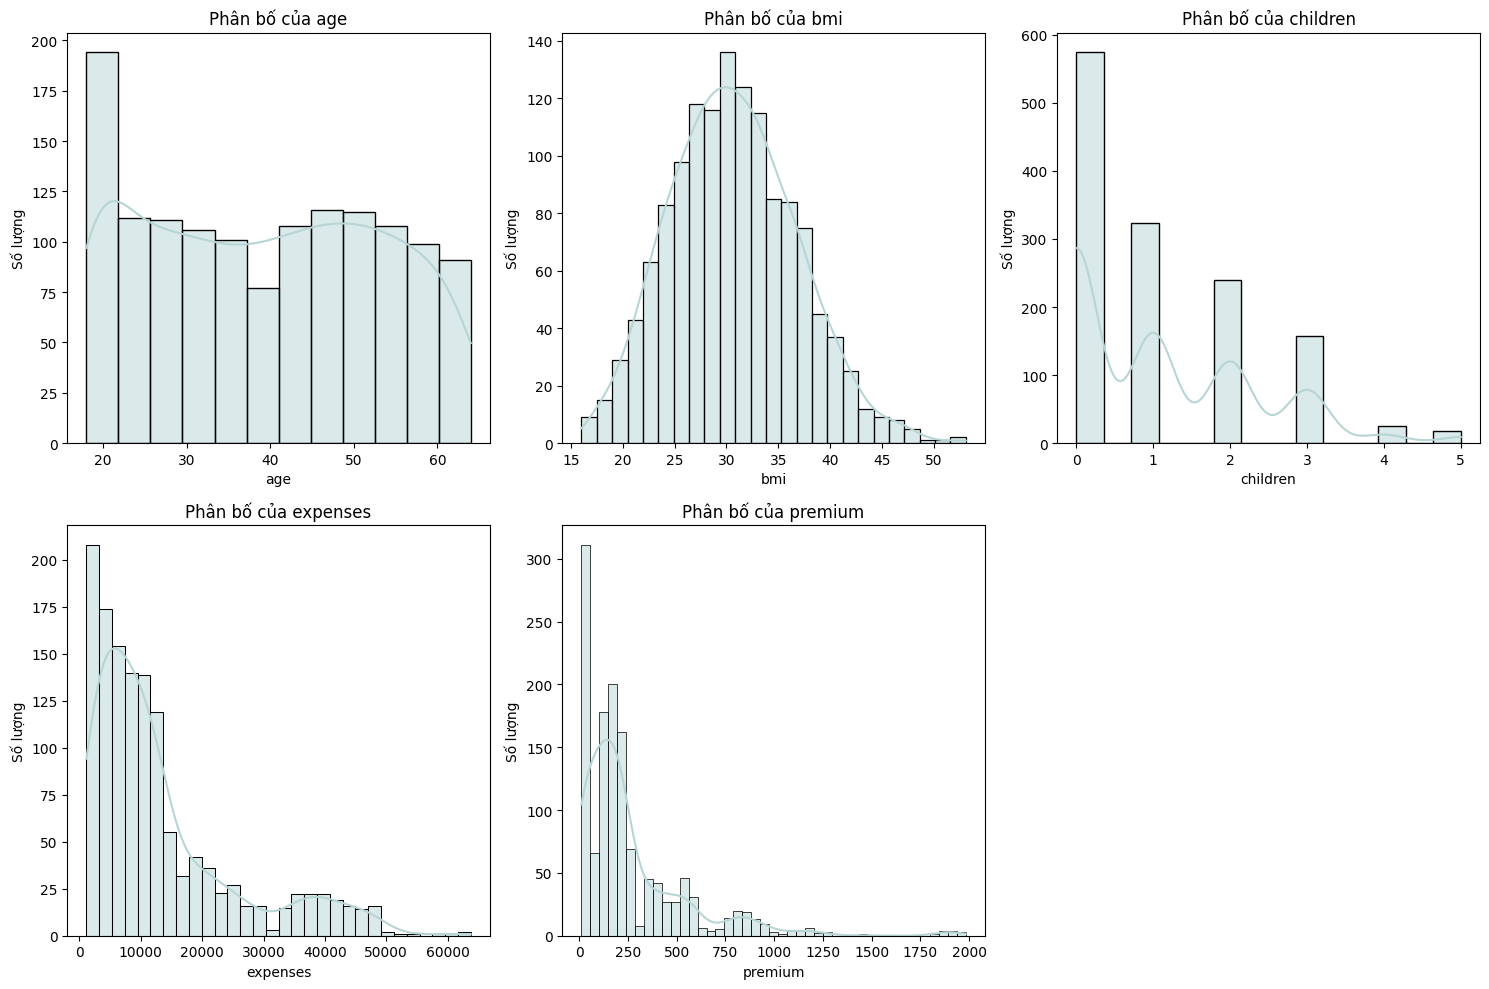

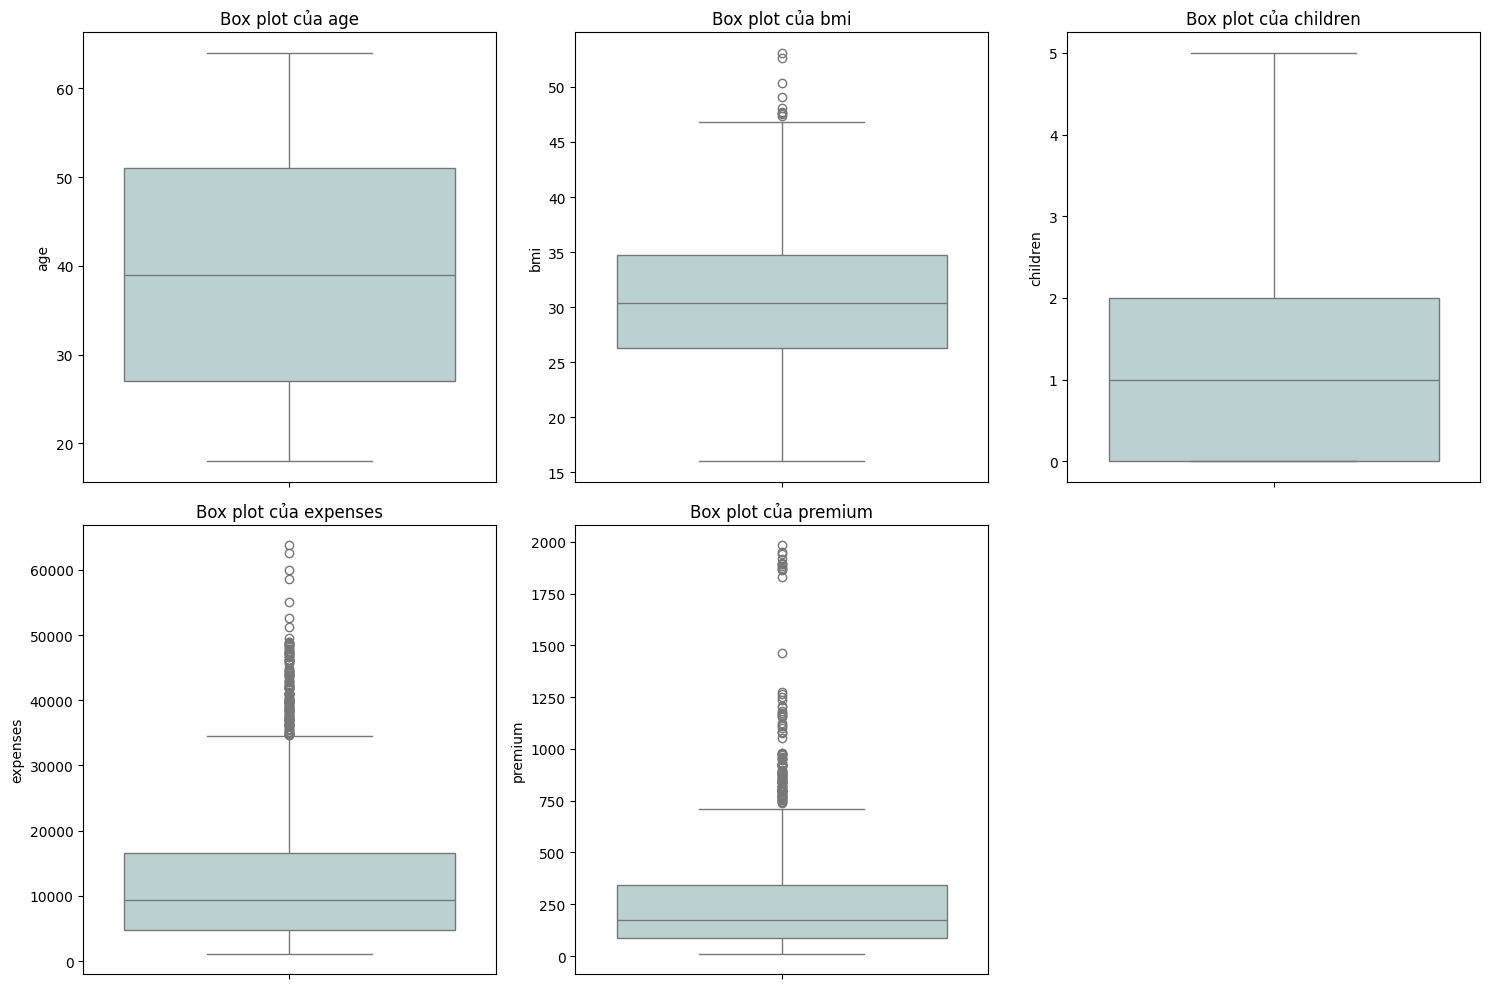

In [26]:
if data is not None: # Đảm bảo df đã được tải
    numerical_cols = ['age', 'bmi', 'children', 'expenses', 'premium']

    plt.figure(figsize=(15, 10)) # Kích thước tổng thể của hình
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, 3, i + 1) # Tạo subplot (2 hàng, 3 cột)
        sns.histplot(data[col], kde=True) # Vẽ histogram và đường KDE
        plt.title(f'Phân bố của {col}')
        plt.xlabel(col)
        plt.ylabel('Số lượng')
    plt.tight_layout() # Tự động điều chỉnh khoảng cách giữa các subplot
    plt.show()

    # Để có thêm góc nhìn, xem box plot để dễ dàng nhận diện outliers
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols):
        plt.subplot(2, 3, i + 1)
        sns.boxplot(y=data[col]) # Vẽ box plot
        plt.title(f'Box plot của {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

保険加入者の年齢は18歳から約65歳まで比較的均等に分布しています。肥満者の割合は、特に30〜32歳のあたりでかなり高くなっています。データセット内の大多数の人は子供がいません。人々は主に生活費に重点を置いており、保険料の支払いが多いです。年齢が高くなるほど、保険加入者の割合は低くなっています。

Convert categorical features into numerical form (object -> number).

Consider applying log transformation to the right-skewed columns. Using log transformation helps to make the data more symmetric and improves the performance of regression models.
We will create new columns to retain the original data.

In [27]:
print("--- Dataset goc truoc khi Encoding ---")
print(data.head())
print(data.dtypes)

# Thuc hien One-Hot Encoding cho cac cot dinh tinh
# drop_first=True giup tranh van de da cong tuyen (multicollinearity)
data_encoded = pd.get_dummies(data, columns=['gender', 'discount_eligibility', 'region'], drop_first=True)

print("\n--- Dataset sau khi One-Hot Encoding ---")
print(data_encoded.head())
print(data_encoded.dtypes)

# Check dataset
print(f"\nNew Dataset: {data_encoded.shape}")

--- Dataset goc truoc khi Encoding ---
   age  gender    bmi  children discount_eligibility     region  expenses  premium
0   19  female 27.900         0                  yes  southwest 16884.920  168.849
1   18    male 33.800         1                   no  southeast  1725.550   17.256
2   28    male 33.000         3                   no  southeast  4449.460   44.495
3   33    male 22.700         0                   no  northwest 21984.470  439.689
4   32    male 28.900         0                   no  northwest  3866.860   77.337
age                       int64
gender                   object
bmi                     float64
children                  int64
discount_eligibility     object
region                   object
expenses                float64
premium                 float64
dtype: object

--- Dataset sau khi One-Hot Encoding ---
   age    bmi  children  expenses  premium  gender_male  discount_eligibility_yes  region_northwest  region_southeast  region_southwest
0   19 27.900  

Log Transformation


--- Dataset sau khi thêm các cột Log-Transformed (5 dòng đầu) ---
   expenses  log_expenses  premium  log_premium
0 16884.920         9.734  168.849        5.129
1  1725.550         7.453   17.256        2.848
2  4449.460         8.401   44.495        3.795
3 21984.470         9.998  439.689        6.086
4  3866.860         8.260   77.337        4.348


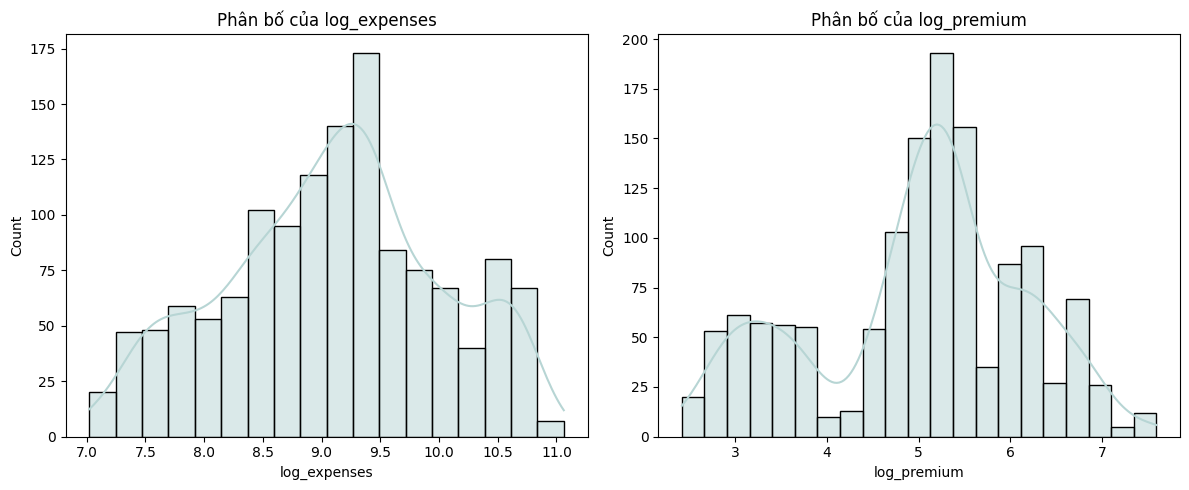

In [28]:
# Tạo các cột mới đã biến đổi log
data['log_expenses'] = np.log(data['expenses'])
data['log_premium'] = np.log(data['premium'])

# Có thể xem xét log cho BMI nếu muốn, nhưng phân bố BMI không quá lệch như expenses/premium
# data['log_bmi'] = np.log(data['bmi'])

print("\n--- Dataset sau khi thêm các cột Log-Transformed (5 dòng đầu) ---")
print(data[['expenses', 'log_expenses', 'premium', 'log_premium']].head())

# Kiểm tra lại phân bố của các cột sau khi log-transformed (để hình dung trực quan)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['log_expenses'], kde=True)
plt.title('Phân bố của log_expenses')

plt.subplot(1, 2, 2)
sns.histplot(data['log_premium'], kde=True)
plt.title('Phân bố của log_premium')

plt.tight_layout()
plt.show()

Applying the log transformation to expenses and premium was a very wise decision and has yielded clear benefits. These variables now have distributions that are much more suitable for building machine learning models, especially regression models. This helps minimize the impact of outliers and makes the relationships between variables more linear, thereby improving both the accuracy and interpretability of the model.


Dataset gốc đã được tải lại thành công.
5 dòng đầu của dataset gốc:
   age  gender    bmi  children discount_eligibility     region  expenses  premium
0   19  female 27.900         0                  yes  southwest 16884.920  168.849
1   18    male 33.800         1                   no  southeast  1725.550   17.256
2   28    male 33.000         3                   no  southeast  4449.460   44.495
3   33    male 22.700         0                   no  northwest 21984.470  439.689
4   32    male 28.900         0                   no  northwest  3866.860   77.337

Thông tin dtypes của dataset gốc:
age                       int64
gender                   object
bmi                     float64
children                  int64
discount_eligibility     object
region                   object
expenses                float64
premium                 float64
dtype: object

Các cột trong DataFrame 'data':
Index(['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region', 'expenses', 'premiu

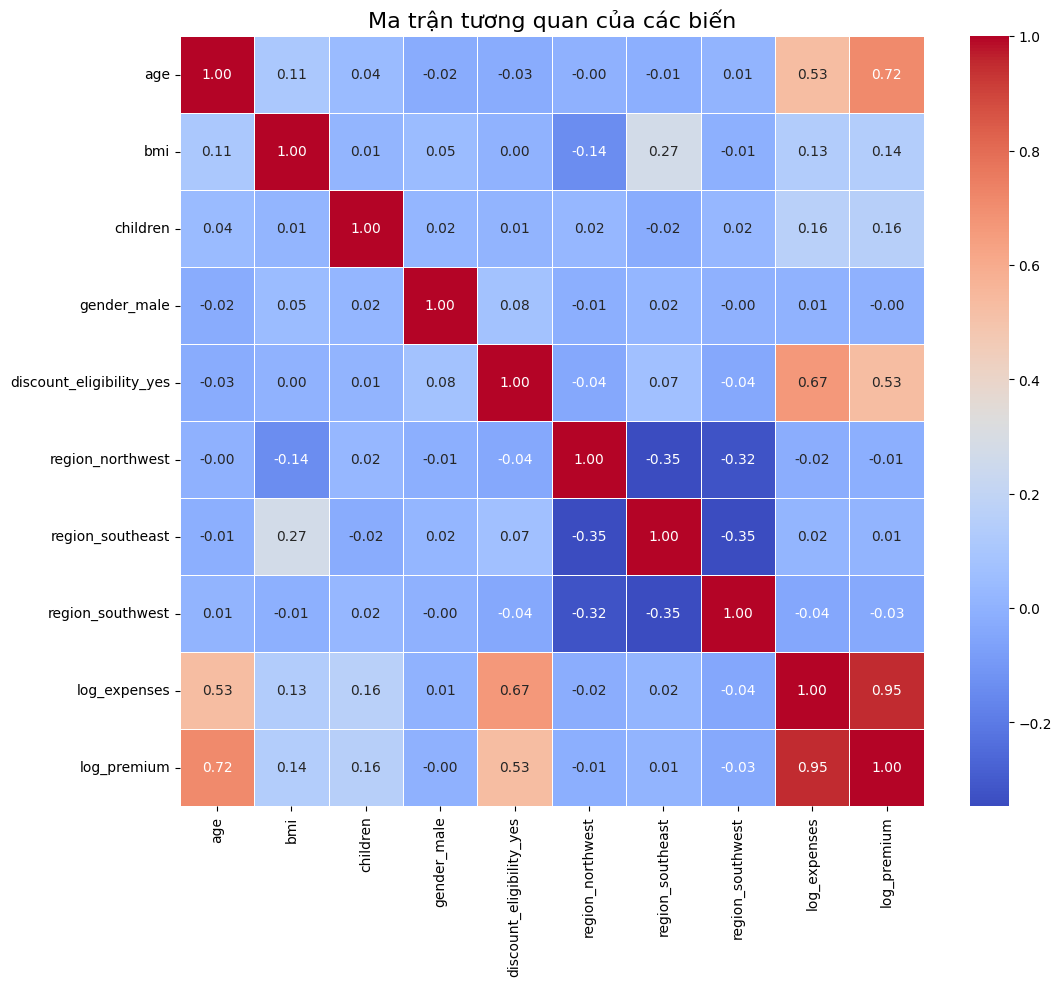


--- Hệ số tương quan với log_expenses ---
log_expenses                1.000
log_premium                 0.953
discount_eligibility_yes    0.666
age                         0.528
children                    0.161
bmi                         0.133
region_southeast            0.016
gender_male                 0.006
region_northwest           -0.018
region_southwest           -0.042
Name: log_expenses, dtype: float64

--- Hệ số tương quan với log_premium ---
log_premium                 1.000
log_expenses                0.953
age                         0.715
discount_eligibility_yes    0.527
children                    0.155
bmi                         0.142
region_southeast            0.011
gender_male                -0.002
region_northwest           -0.013
region_southwest           -0.031
Name: log_premium, dtype: float64


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- BƯỚC 1: Đọc lại dataset gốc ---
try:
    data = pd.read_csv('./data/medical_insurance.csv')
    print("Dataset gốc đã được tải lại thành công.")
    print("5 dòng đầu của dataset gốc:")
    print(data.head())
    print("\nThông tin dtypes của dataset gốc:")
    print(data.dtypes)
    print("\nCác cột trong DataFrame 'data':")
    print(data.columns) # Kiểm tra lại tên cột một lần cuối để xác nhận
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'health_insurance.csv'. Vui lòng kiểm tra lại tên file hoặc đường dẫn.")
    print("Không thể tiếp tục nếu không tải được dataset.")
    data = None

if data is not None:
    # --- BƯỚC 2: Thực hiện One-Hot Encoding cho các cột định tính ---
    # ĐÃ SỬA: Thay 'discount_eligib' thành 'discount_eligibility'
    cols_to_encode = ['gender', 'discount_eligibility', 'region'] # Sửa tên cột tại đây

    missing_cols = [col for col in cols_to_encode if col not in data.columns]
    if missing_cols:
        print(f"\nLỗi: Các cột sau không tìm thấy trong dataset trước khi One-Hot Encoding: {missing_cols}")
        print("Vui lòng kiểm tra lại tên cột trong file CSV gốc của bạn.")
    else:
        data_encoded = pd.get_dummies(data, columns=cols_to_encode, drop_first=True)

        print("\n--- Dataset sau khi One-Hot Encoding (5 dòng đầu) ---")
        print(data_encoded.head())
        print(data_encoded.dtypes)
        print(f"Kích thước dataset sau encoding: {data_encoded.shape}")


        # --- BƯỚC 3: Biến đổi Log cho các cột chi phí (expenses và premium) ---
        data_encoded['log_expenses'] = np.log(data_encoded['expenses'])
        data_encoded['log_premium'] = np.log(data_encoded['premium'])

        print("\n--- Dataset sau khi thêm các cột Log-Transformed (5 dòng đầu) ---")
        print(data_encoded[['expenses', 'log_expenses', 'premium', 'log_premium']].head())


        # --- BƯỚC 4: Tính toán và trực quan hóa ma trận tương quan ---

        # Danh sách các cột để tính tương quan.
        # Cột mới từ encoding sẽ là 'discount_eligibility_yes'
        cols_for_corr = [
            'age',
            'bmi',
            'children',
            'gender_male',
            'discount_eligibility_yes', # SỬA TÊN CỘT MỚI Ở ĐÂY
            'region_northwest',
            'region_southeast',
            'region_southwest',
            'log_expenses',
            'log_premium'
        ]

        missing_cols_corr = [col for col in cols_for_corr if col not in data_encoded.columns]
        if missing_cols_corr:
            print(f"\nLỗi: Các cột sau không tìm thấy trong dataset đã mã hóa khi tính tương quan: {missing_cols_corr}")
            print("Vui lòng kiểm tra lại các cột đã tạo từ One-Hot Encoding.")
        else:
            correlation_matrix = data_encoded[cols_for_corr].corr()

            plt.figure(figsize=(12, 10))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
            plt.title('Ma trận tương quan của các biến', fontsize=16)
            plt.show()

            print("\n--- Hệ số tương quan với log_expenses ---")
            print(correlation_matrix['log_expenses'].sort_values(ascending=False))

            print("\n--- Hệ số tương quan với log_premium ---")
            print(correlation_matrix['log_premium'].sort_values(ascending=False))

- ヒートマップはすべての変数ペア間の線形関係を表示します。

- 濃い赤色は強い正の相関を示します（ある変数が増加すると、もう一方の変数も増加します）。

- 濃い青色は強い負の相関を示します（ある変数が増加すると、もう一方の変数は減少します）。

- 白または薄い色は弱い相関または線形相関がないことを示します。

- 主対角線上の値は常に1.00であり、これは変数が自身と完全に相関しているためです。


相関行列から得られた主なインサイト：
費用と保険料の関係：
log_expensesとlog_premiumは非常に強い相関を示しており、本データセットにおける「保険関連費用」の非常に似た側面を表していることがわかります。

最も影響力のある要因：
age（年齢）とdiscount_eligibility_yes（割引適格者）が、log_expensesおよびlog_premiumと最も強い線形相関を持つ要因です。

興味深い発見（さらなる調査が必要なインサイト）：
discount_eligibility_yesと費用・保険料の間に強い正の相関があることは非常に興味深く、この割引ポリシーがどのように機能しているかについての重要な示唆となる可能性があります。割引対象者の方が費用が高い傾向がある理由を深く掘り下げる必要があります。

影響の小さい要因：
gender（性別）、children（子供の人数）、bmi、region（地域）は、費用・保険料と弱い線形相関を示しています。これはこれらの要因が影響を与えないという意味ではなく、単純な線形関係が強くないか、または非線形の関係である可能性を示しています。


--- Biểu đồ phân tán: age vs. log_expenses và log_premium ---


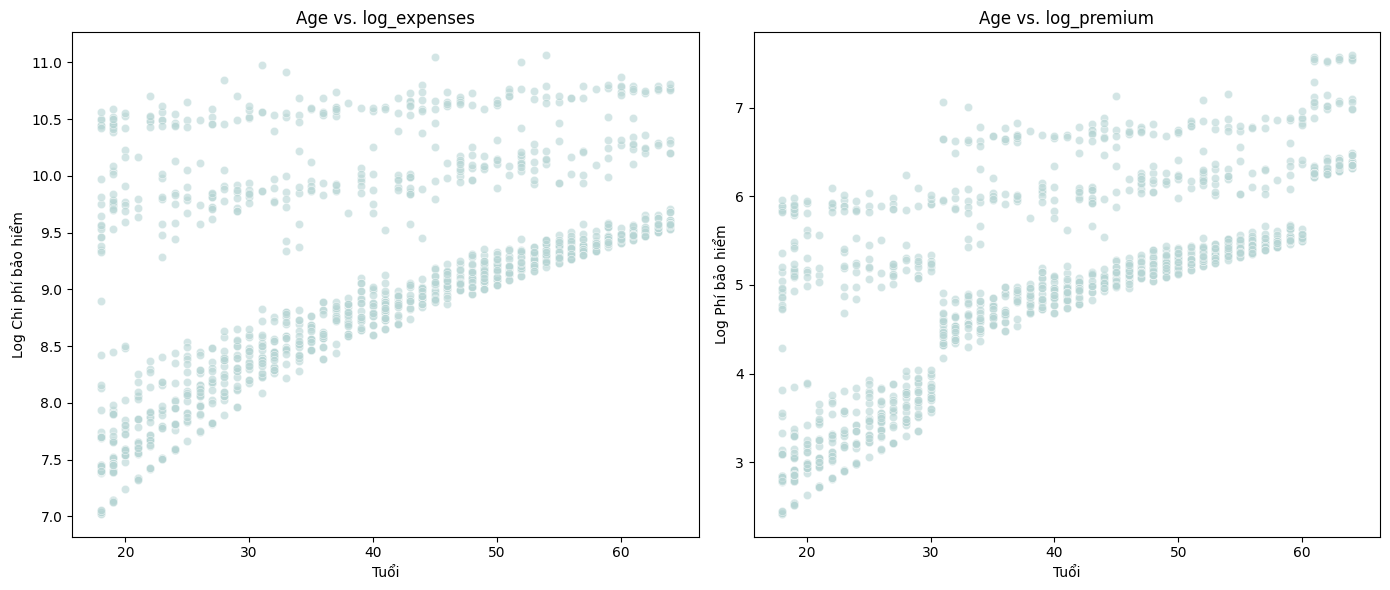


--- Biểu đồ phân tán: bmi vs. log_expenses và log_premium ---


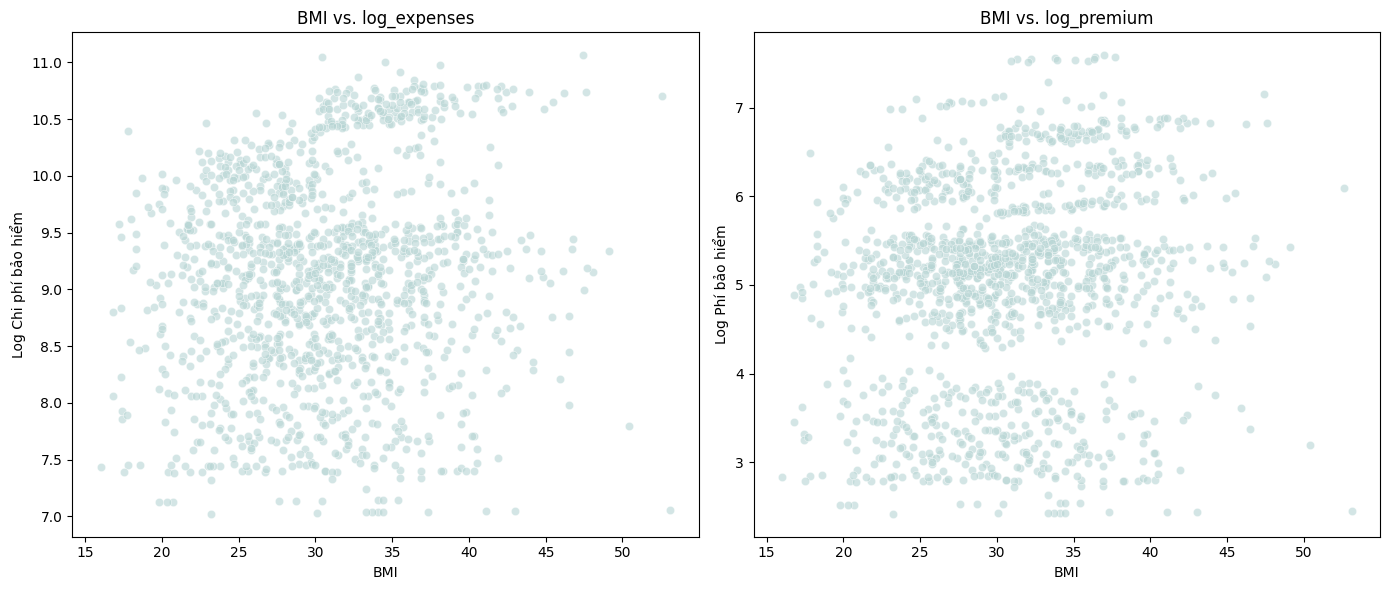

In [37]:
if 'data_encoded' not in locals():
    print("DataFrame 'data_encoded' chưa được tạo. Vui lòng chạy lại các bước tiền xử lý từ đầu.")
else:
    print("\n--- Biểu đồ phân tán: age vs. log_expenses và log_premium ---")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1) # 1 hàng, 2 cột, vị trí 1
    sns.scatterplot(x='age', y='log_expenses', data=data_encoded, alpha=0.6)
    plt.title('Age vs. log_expenses')
    plt.xlabel('Tuổi')
    plt.ylabel('Log Chi phí bảo hiểm')

    plt.subplot(1, 2, 2) # 1 hàng, 2 cột, vị trí 2
    sns.scatterplot(x='age', y='log_premium', data=data_encoded, alpha=0.6)
    plt.title('Age vs. log_premium')
    plt.xlabel('Tuổi')
    plt.ylabel('Log Phí bảo hiểm')

    plt.tight_layout()
    plt.show()

    print("\n--- Biểu đồ phân tán: bmi vs. log_expenses và log_premium ---")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x='bmi', y='log_expenses', data=data_encoded, alpha=0.6)
    plt.title('BMI vs. log_expenses')
    plt.xlabel('BMI')
    plt.ylabel('Log Chi phí bảo hiểm')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x='bmi', y='log_premium', data=data_encoded, alpha=0.6)
    plt.title('BMI vs. log_premium')
    plt.xlabel('BMI')
    plt.ylabel('Log Phí bảo hiểm')

    plt.tight_layout()
    plt.show()

散布図分析（Scatter Plots）
年齢（Age）対 log_expensesおよびAge対 log_premiumのグラフ
全体的な観察：両方のグラフとも、年齢（age）とログ変換された費用／保険料（log_expenses、log_premium）の間に明確な正の相関関係が見られます。年齢が上がるにつれて、費用や保険料も増加する傾向があります。これは先に確認した強い相関係数（log_expensesは0.528、log_premiumは0.715）と一致します。

「層」または「グループ」の存在：非常に注目すべき点は、データが連続的に散らばるのではなく、特にlog_expensesではいくつかの明確な「層」や「グループ」に分かれていることです。

これは、データセット内に異なるグループが存在し、それぞれの保険費用が年齢によって決定されるものの、基準となる費用レベルが異なることを示唆しています。例えば、喫煙／非喫煙など健康状態やその他のリスク要因が年齢以外に存在し、それが異なる初期費用レベルを生んでいる可能性があります。

これらのグループは、年齢に対する費用や保険料の増加率（各層の傾き）が異なるようです。

保険料と費用の比較：ageとlog_premiumの関係はageとlog_expensesよりもやや線形性が高いように見えますが、どちらも同様の傾向と「層」構造を示しています。

インサイト：年齢は費用と保険料の両方に対して強力な予測因子です。明確な「層」の存在は、年齢と強く相互作用し保険費用を決定する他の定性的要因が存在することを示しています。例えば、discount_eligibility_yes（喫煙状態を示唆）やregion（地域）がこれらの層の原因かもしれません。

BMI対 log_expensesおよびBMI対 log_premiumのグラフ
全体的な観察：bmiとlog_expenses/log_premiumの関係は非常に散らばっており、ageのような明確な線形傾向は見られません。これは弱い相関係数（log_expensesは0.133、log_premiumは0.142）とも一致しています。

弱い傾向：相関は正ですが、明確な直線的パターンはありません。BMIが上がるにつれて費用や保険料がわずかに増加するように見えますが、その関係は強くありません。

データの集中：データ点の大半はBMIが20〜35の範囲に集中しています。高いBMIの外れ値も存在しますが、明確な傾向は示していません。

再び「層」の出現：ageの場合と同様に、BMIのグラフにも「層」が存在します。特に高い費用／保険料のレベルで、BMIに関係なく費用が高いグループが見られます。

インサイト：BMIは健康に関連しますが、保険費用に対する単純な線形関係は弱いようです。これはBMIがより複雑な影響要因であるか、他の因子に影響が隠れているためかもしれません。ここでの「層」は、BMIがdiscount_eligibility_yesやregionなど他の変数と相互作用して異なる費用レベルを生み出している可能性を示唆しています。




--- Biểu đồ hộp: log_expenses và log_premium theo discount_eligibility_yes ---


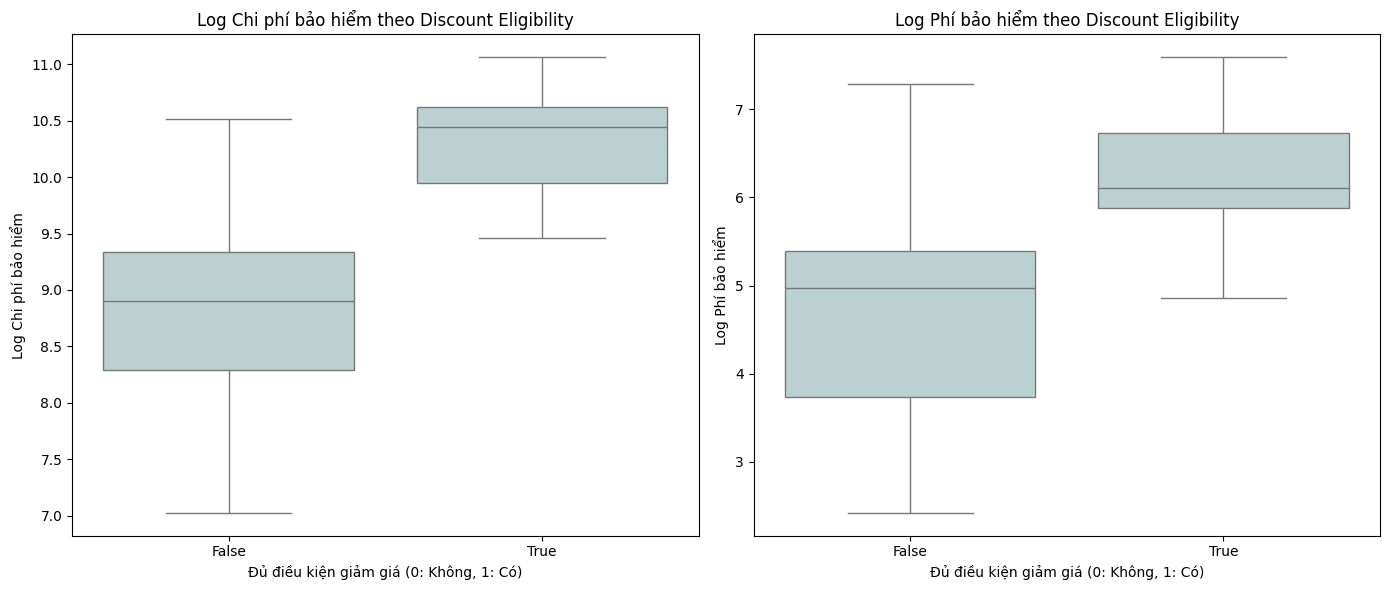


--- Biểu đồ hộp: log_expenses và log_premium theo gender_male ---


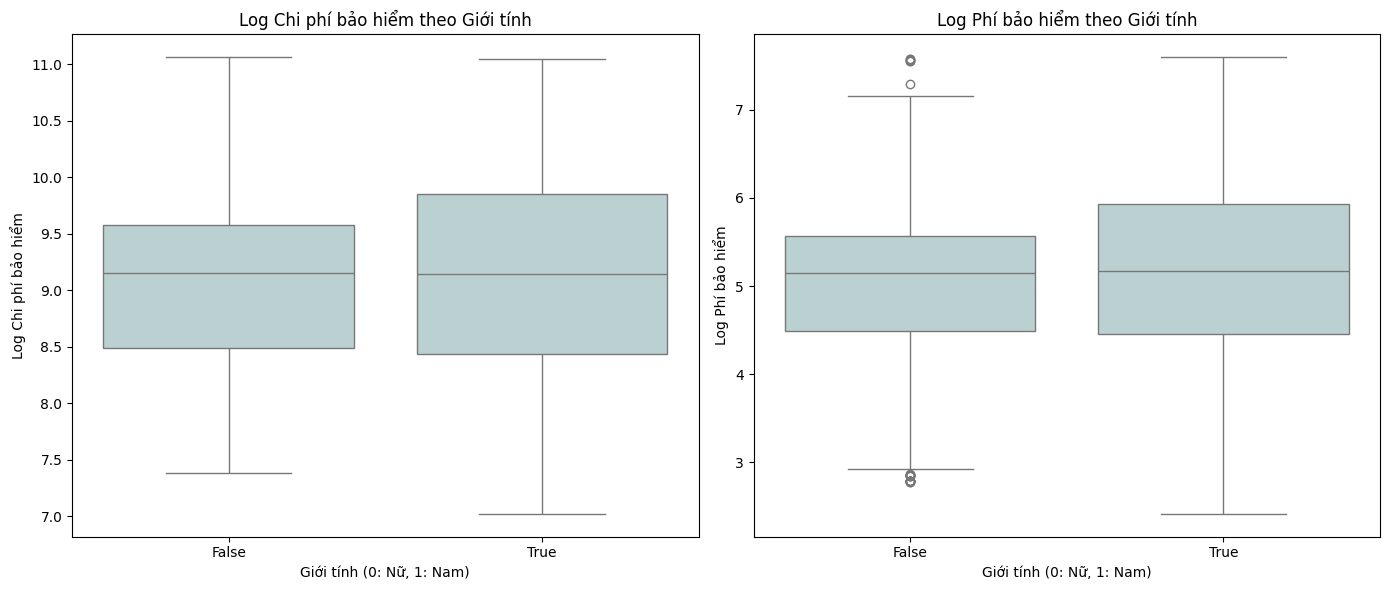


--- Biểu đồ hộp: log_expenses và log_premium theo region ---


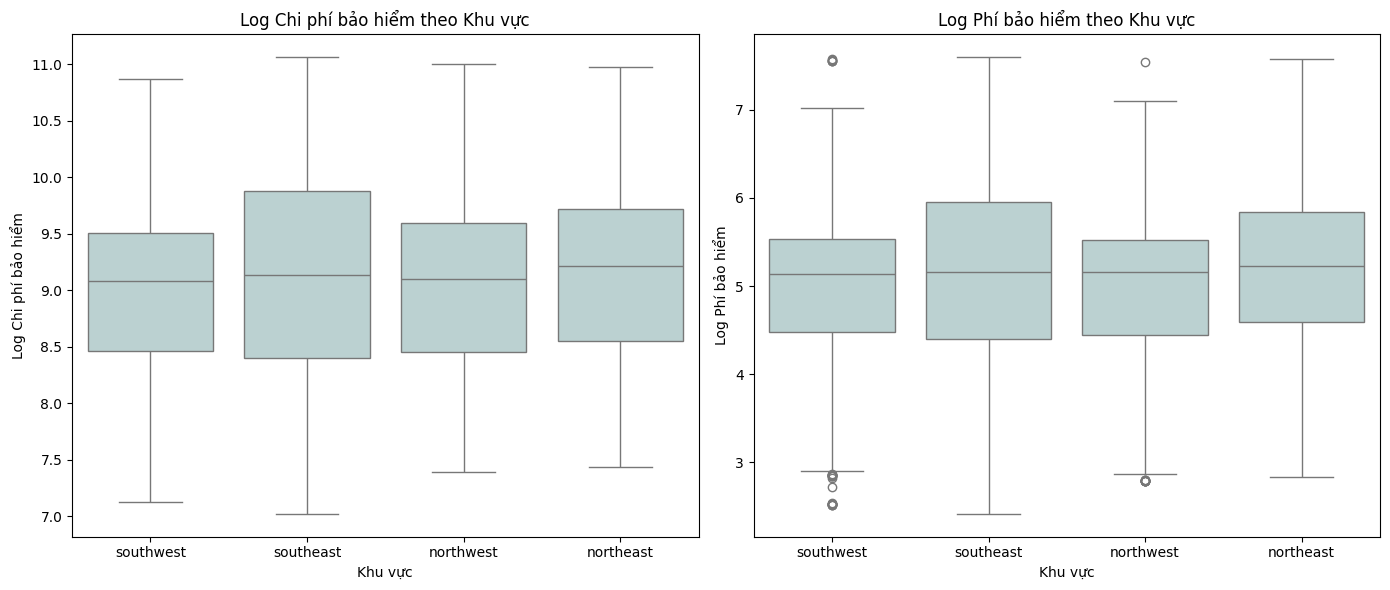

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử 'data_encoded' là DataFrame của bạn sau khi đã thực hiện One-Hot Encoding và Log Transformation.
# Nếu bạn vừa khởi động lại kernel hoặc chưa chạy, hãy đảm bảo 'data_encoded' đã được tạo lại
# bằng cách chạy lại toàn bộ khối code ở các bước trước đó.

if 'data_encoded' not in locals():
    print("DataFrame 'data_encoded' chưa được tạo. Vui lòng chạy lại các bước tiền xử lý từ đầu.")
else:
    print("\n--- Biểu đồ hộp: log_expenses và log_premium theo discount_eligibility_yes ---")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='discount_eligibility_yes', y='log_expenses', data=data_encoded)
    plt.title('Log Chi phí bảo hiểm theo Discount Eligibility')
    plt.xlabel('Đủ điều kiện giảm giá (0: Không, 1: Có)')
    plt.ylabel('Log Chi phí bảo hiểm')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='discount_eligibility_yes', y='log_premium', data=data_encoded)
    plt.title('Log Phí bảo hiểm theo Discount Eligibility')
    plt.xlabel('Đủ điều kiện giảm giá (0: Không, 1: Có)')
    plt.ylabel('Log Phí bảo hiểm')

    plt.tight_layout()
    plt.show()

    print("\n--- Biểu đồ hộp: log_expenses và log_premium theo gender_male ---")
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x='gender_male', y='log_expenses', data=data_encoded)
    plt.title('Log Chi phí bảo hiểm theo Giới tính')
    plt.xlabel('Giới tính (0: Nữ, 1: Nam)')
    plt.ylabel('Log Chi phí bảo hiểm')

    plt.subplot(1, 2, 2)
    sns.boxplot(x='gender_male', y='log_premium', data=data_encoded)
    plt.title('Log Phí bảo hiểm theo Giới tính')
    plt.xlabel('Giới tính (0: Nữ, 1: Nam)')
    plt.ylabel('Log Phí bảo hiểm')

    plt.tight_layout()
    plt.show()

    print("\n--- Biểu đồ hộp: log_expenses và log_premium theo region ---")
    # Để sử dụng biến 'region' gốc, chúng ta cần dùng lại DataFrame 'data' hoặc điều chỉnh để dùng các cột One-Hot
    # Tuy nhiên, để biểu diễn box plot theo region, dùng các cột encoded không tiện
    # Cách tốt nhất là dùng lại cột 'region' gốc từ DataFrame 'data' trước khi encoding
    # Nếu bạn đã chạy toàn bộ code trước đó, bạn có thể có 'data' ban đầu
    # Hoặc chúng ta sẽ phải đọc lại data gốc để plot theo region
    # Giả sử bạn có DataFrame 'data' ban đầu còn tồn tại:
    
    # Cách tốt nhất là đọc lại dữ liệu gốc và merge cột log_expenses/log_premium vào đó để plot
    # Hoặc nếu bạn muốn làm trên data_encoded, bạn sẽ phải dùng melted dataframe hoặc chỉ dùng một cột region
    # Nhưng để đơn giản và trực quan, ta sẽ đọc lại dữ liệu gốc nếu cần và thêm cột log_expenses/log_premium

    try:
        data_original = pd.read_csv('./data/medical_insurance.csv')
        data_original['log_expenses'] = np.log(data_original['expenses'])
        data_original['log_premium'] = np.log(data_original['premium'])

        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(x='region', y='log_expenses', data=data_original)
        plt.title('Log Chi phí bảo hiểm theo Khu vực')
        plt.xlabel('Khu vực')
        plt.ylabel('Log Chi phí bảo hiểm')

        plt.subplot(1, 2, 2)
        sns.boxplot(x='region', y='log_premium', data=data_original)
        plt.title('Log Phí bảo hiểm theo Khu vực')
        plt.xlabel('Khu vực')
        plt.ylabel('Log Phí bảo hiểm')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\nKhông thể tạo biểu đồ hộp theo region. Lỗi: {e}")
        print("Đảm bảo file 'health_insurance.csv' có sẵn hoặc điều chỉnh cách tạo DataFrame gốc.")

1. 割引適格によるログ変換された保険費用および保険料の分析
- 意味：割引を受けられる人々の方が、実際には保険費用および保険料が高いことが確認されました。これは「割引」という言葉の一般的なイメージとは逆の関係です。

仮説：これはおそらく、これらの人々がより高リスク群（例えば喫煙者）に属しており、「割引」ポリシーは実際にはリスク補償のための追加料金やペナルティの一種であるためと考えられます。または、割引が費用のごく一部にのみ適用されていても、彼らの総費用は依然として高い可能性があります。これは予測モデルを構築する際に非常に重要な要素です。

2. 性別によるログ変換された保険費用および保険料の分析

- 男性グループはわずかに高めに見えますが、有意な差はありません。

- 男性と女性のlog_premiumも非常に近い値を示しています。

- 性別は本データセットにおいて、保険費用や保険料に大きな影響を与える主要な要因ではないようです。

3. 地域によるログ変換された保険費用および保険料の分析
   Southeast地域は他の地域と比べて平均的にやや高めの保険費用および保険料の傾向があります。これは、その地域の医療費が高いことや、高リスクの人が多く集中していることが要因として考えられます。

EDAから得られたインサイトのまとめ
1. Age（年齢）：費用および保険料の最も強力な予測因子であり、年齢の上昇に伴い増加する傾向があります。データの「層」の存在は、他の定性的変数との強い相互作用を示唆しています。

2. discount_eligibility_yes（割引適格の有無）：非常に重要な要素であり、注意が必要です。割引適格者は実際には費用および保険料がかなり高い傾向があります。これは喫煙という要因によるものである可能性が高く（喫煙は高額な保険費用の主要因であり、時にリスク補償のために「割引」が適用されることがあります）。

3. BMI：費用や保険料との線形関係は弱く散らばっています。BMIは他の要因と相互作用している可能性があります。

4. Region（地域）：Southeast地域は他の地域よりも平均的にやや高めの費用および保険料を示しています。

5. Gender（性別）：男性と女性の間で費用や保険料に有意な差は見られません。

6. Children（子供の数）：相関行列によると、費用や保険料との相関は弱いです。

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Giả sử 'data_encoded' là DataFrame của bạn sau khi đã thực hiện One-Hot Encoding và Log Transformation.
# Nếu bạn vừa khởi động lại kernel hoặc chưa chạy, hãy đảm bảo 'data_encoded' đã được tạo lại
# bằng cách chạy lại toàn bộ khối code ở các bước trước đó.

if 'data_encoded' not in locals():
    print("DataFrame 'data_encoded' chưa được tạo. Vui lòng chạy lại các bước tiền xử lý từ đầu.")
else:
    # 1. Xác định biến đầu vào (X) và biến mục tiêu (y)
    # Loại bỏ 'expenses' và 'premium' gốc vì chúng ta đã có phiên bản log
    # Loại bỏ luôn 'log_premium' nếu mục tiêu chính là dự đoán 'log_expenses'
    X = data_encoded.drop(columns=['expenses', 'premium', 'log_expenses', 'log_premium'])
    y = data_encoded['log_expenses'] # Biến mục tiêu là log_expenses

    print(f"\nKích thước của tập X (features): {X.shape}")
    print(f"Kích thước của tập y (target): {y.shape}")
    print("\n5 dòng đầu của X:")
    print(X.head())
    print("\n5 dòng đầu của y:")
    print(y.head())

    # 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
    # test_size=0.20 có nghĩa là 20% dữ liệu sẽ được dùng cho tập kiểm tra
    # random_state=42 để đảm bảo kết quả chia dữ liệu có thể lặp lại (reproducible)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    print("\n--- Kích thước các tập dữ liệu sau khi chia ---")
    print(f"Kích thước X_train: {X_train.shape}")
    print(f"Kích thước X_test: {X_test.shape}")
    print(f"Kích thước y_train: {y_train.shape}")
    print(f"Kích thước y_test: {y_test.shape}")


Kích thước của tập X (features): (1338, 8)
Kích thước của tập y (target): (1338,)

5 dòng đầu của X:
   age    bmi  children  gender_male  discount_eligibility_yes  region_northwest  region_southeast  region_southwest
0   19 27.900         0        False                      True             False             False              True
1   18 33.800         1         True                     False             False              True             False
2   28 33.000         3         True                     False             False              True             False
3   33 22.700         0         True                     False              True             False             False
4   32 28.900         0         True                     False              True             False             False

5 dòng đầu của y:
0   9.734
1   7.453
2   8.401
3   9.998
4   8.260
Name: log_expenses, dtype: float64

--- Kích thước các tập dữ liệu sau khi chia ---
Kích thước X_train: (1070, 8)
Kích thước X_

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử X_train, X_test, y_train, y_test đã được tạo từ bước trước.
# Nếu bạn vừa khởi động lại kernel hoặc chưa chạy, hãy đảm bảo các biến này đã được tạo lại
# bằng cách chạy lại toàn bộ khối code từ các bước tiền xử lý và chia dữ liệu.

if 'X_train' not in locals():
    print("Các tập dữ liệu X_train, X_test, y_train, y_test chưa được tạo. Vui lòng chạy lại các bước tiền xử lý và chia dữ liệu từ đầu.")
else:
    print("\n--- Huấn luyện Mô hình Hồi quy Tuyến tính ---")

    # Khởi tạo mô hình Hồi quy Tuyến tính
    model = LinearRegression()

    # Huấn luyện mô hình trên tập huấn luyện
    model.fit(X_train, y_train)

    print("Mô hình Hồi quy Tuyến tính đã được huấn luyện thành công.")

    # Đánh giá hiệu suất của mô hình trên tập kiểm tra
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Đảo ngược biến đổi log để đưa về đơn vị chi phí ban đầu (USD)
    # Rất quan trọng khi đánh giá MSE và giải thích kết quả
    y_train_exp = np.exp(y_train)
    y_test_exp = np.exp(y_test)
    y_pred_train_exp = np.exp(y_pred_train)
    y_pred_test_exp = np.exp(y_pred_test)


    print("\n--- Đánh giá hiệu suất mô hình (trên log-transformed data) ---")
    # Mean Squared Error (MSE) trên tập huấn luyện
    mse_train_log = mean_squared_error(y_train, y_pred_train)
    print(f"MSE trên tập huấn luyện (log-transformed): {mse_train_log:.4f}")

    # R-squared (R2) trên tập huấn luyện
    r2_train_log = r2_score(y_train, y_pred_train)
    print(f"R2 trên tập huấn luyện (log-transformed): {r2_train_log:.4f}")

    # Mean Squared Error (MSE) trên tập kiểm tra
    mse_test_log = mean_squared_error(y_test, y_pred_test)
    print(f"MSE trên tập kiểm tra (log-transformed): {mse_test_log:.4f}")

    # R-squared (R2) trên tập kiểm tra
    r2_test_log = r2_score(y_test, y_pred_test)
    print(f"R2 trên tập kiểm tra (log-transformed): {r2_test_log:.4f}")

    print("\n--- Đánh giá hiệu suất mô hình (trên dữ liệu gốc - USD) ---")
    # Mean Squared Error (MSE) trên tập huấn luyện (USD)
    mse_train_exp = mean_squared_error(y_train_exp, y_pred_train_exp)
    print(f"MSE trên tập huấn luyện (USD): {mse_train_exp:.2f}")

    # R-squared (R2) trên tập huấn luyện (USD)
    r2_train_exp = r2_score(y_train_exp, y_pred_train_exp)
    print(f"R2 trên tập huấn luyện (USD): {r2_train_exp:.4f}")

    # Mean Squared Error (MSE) trên tập kiểm tra (USD)
    mse_test_exp = mean_squared_error(y_test_exp, y_pred_test_exp)
    print(f"MSE trên tập kiểm tra (USD): {mse_test_exp:.2f}")

    # R-squared (R2) trên tập kiểm tra (USD)
    r2_test_exp = r2_score(y_test_exp, y_pred_test_exp)
    print(f"R2 trên tập kiểm tra (USD): {r2_test_exp:.4f}")

    # In ra các hệ số (coefficients) của mô hình
    print("\n--- Hệ số của mô hình Hồi quy Tuyến tính ---")
    coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
    print(coefficients_df.sort_values(by='Coefficient', ascending=False))
    print(f"Intercept (Hệ số chặn): {model.intercept_:.4f}")


--- Huấn luyện Mô hình Hồi quy Tuyến tính ---
Mô hình Hồi quy Tuyến tính đã được huấn luyện thành công.

--- Đánh giá hiệu suất mô hình (trên log-transformed data) ---
MSE trên tập huấn luyện (log-transformed): 0.2016
R2 trên tập huấn luyện (log-transformed): 0.7572
MSE trên tập kiểm tra (log-transformed): 0.1756
R2 trên tập kiểm tra (log-transformed): 0.8047

--- Đánh giá hiệu suất mô hình (trên dữ liệu gốc - USD) ---
MSE trên tập huấn luyện (USD): 70419998.40
R2 trên tập huấn luyện (USD): 0.5121
MSE trên tập kiểm tra (USD): 61077230.10
R2 trên tập kiểm tra (USD): 0.6066

--- Hệ số của mô hình Hồi quy Tuyến tính ---
                    Feature  Coefficient
4  discount_eligibility_yes        1.552
2                  children        0.092
0                       age        0.034
1                       bmi        0.014
5          region_northwest       -0.056
3               gender_male       -0.074
7          region_southwest       -0.123
6          region_southeast       -0.136
Inter


--- Huấn luyện và đánh giá: Linear Regression ---
Mô hình Linear Regression đã được huấn luyện.
  MSE Test (log): 0.1756
  R2 Test (log): 0.8047
  MSE Test (USD): 61077230.10
  R2 Test (USD): 0.6066

--- Huấn luyện và đánh giá: Ridge Regression ---
Mô hình Ridge Regression đã được huấn luyện.
  MSE Test (log): 0.1757
  R2 Test (log): 0.8046
  MSE Test (USD): 60236434.53
  R2 Test (USD): 0.6120

--- Huấn luyện và đánh giá: Random Forest Regressor ---
Mô hình Random Forest Regressor đã được huấn luyện.
  MSE Test (log): 0.1375
  R2 Test (log): 0.8470
  MSE Test (USD): 19113863.21
  R2 Test (USD): 0.8769

--- Huấn luyện và đánh giá: XGBoost Regressor ---
Mô hình XGBoost Regressor đã được huấn luyện.
  MSE Test (log): 0.1695
  R2 Test (log): 0.8114
  MSE Test (USD): 27340949.56
  R2 Test (USD): 0.8239

--- Tóm tắt hiệu suất của tất cả các mô hình ---
                         MSE Train (log)  R2 Train (log)  MSE Test (log)  R2 Test (log)  MSE Train (USD)  R2 Train (USD)  MSE Test (USD)  R2

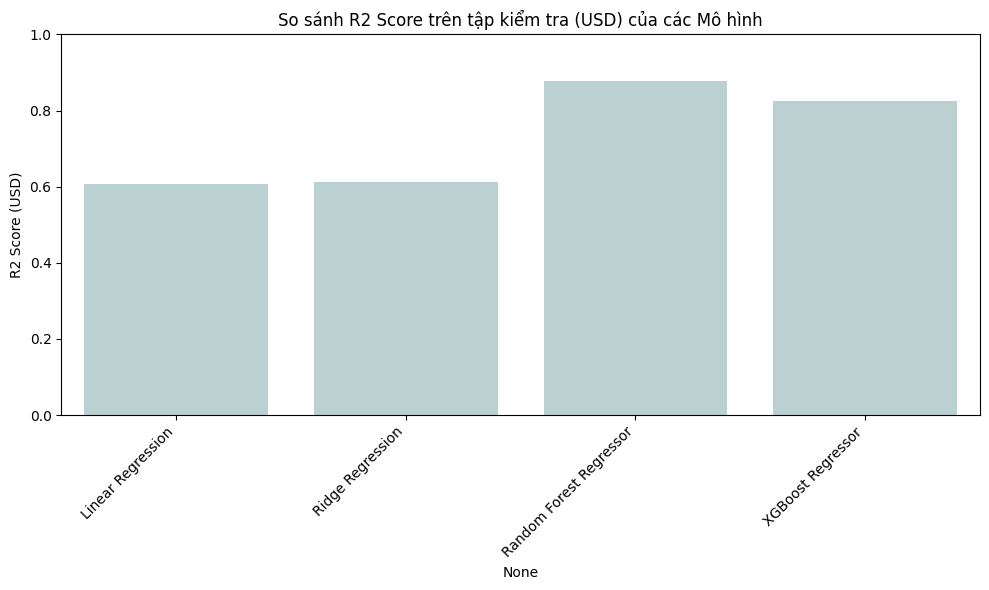

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb # Cần cài đặt: pip install xgboost

# Giả sử X_train, X_test, y_train, y_test đã được tạo từ bước trước.
# Nếu bạn vừa khởi động lại kernel hoặc chưa chạy, hãy đảm bảo các biến này đã được tạo lại
# bằng cách chạy lại toàn bộ khối code từ các bước tiền xử lý và chia dữ liệu.

# Dữ liệu mẫu (nếu chưa có trong môi trường hiện tại)
try:
    if 'X_train' not in locals():
        # Đọc lại dataset gốc và xử lý nếu chưa có
        data = pd.read_csv('health_insurance.csv')
        data_encoded = pd.get_dummies(data, columns=['gender', 'discount_eligibility', 'region'], drop_first=True)
        data_encoded['log_expenses'] = np.log(data_encoded['expenses'])
        data_encoded['log_premium'] = np.log(data_encoded['premium'])
        X = data_encoded.drop(columns=['expenses', 'premium', 'log_expenses', 'log_premium'])
        y = data_encoded['log_expenses']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        print("Đã tải lại và chia dữ liệu.")
except Exception as e:
    print(f"Lỗi khi tải lại và chia dữ liệu: {e}")
    print("Vui lòng đảm bảo file 'health_insurance.csv' có sẵn và các bước trước đã chạy đúng.")


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42), # Thêm random_state cho Ridge để kết quả ổn định hơn
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42), # n_estimators là số cây
    "XGBoost Regressor": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42) # objective cho bài toán hồi quy
}

results = {}

for name, model in models.items():
    print(f"\n--- Huấn luyện và đánh giá: {name} ---")

    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    print(f"Mô hình {name} đã được huấn luyện.")

    # Dự đoán trên tập huấn luyện và kiểm tra
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Đảo ngược biến đổi log để tính toán trên đơn vị USD gốc
    y_train_exp = np.exp(y_train)
    y_test_exp = np.exp(y_test)
    y_pred_train_exp = np.exp(y_pred_train)
    y_pred_test_exp = np.exp(y_pred_test)

    # Đánh giá hiệu suất trên log-transformed data
    mse_train_log = mean_squared_error(y_train, y_pred_train)
    r2_train_log = r2_score(y_train, y_pred_train)
    mse_test_log = mean_squared_error(y_test, y_pred_test)
    r2_test_log = r2_score(y_test, y_pred_test)

    # Đánh giá hiệu suất trên dữ liệu gốc (USD)
    mse_train_exp = mean_squared_error(y_train_exp, y_pred_train_exp)
    r2_train_exp = r2_score(y_train_exp, y_pred_train_exp)
    mse_test_exp = mean_squared_error(y_test_exp, y_pred_test_exp)
    r2_test_exp = r2_score(y_test_exp, y_pred_test_exp)

    results[name] = {
        'MSE Train (log)': mse_train_log,
        'R2 Train (log)': r2_train_log,
        'MSE Test (log)': mse_test_log,
        'R2 Test (log)': r2_test_log,
        'MSE Train (USD)': mse_train_exp,
        'R2 Train (USD)': r2_train_exp,
        'MSE Test (USD)': mse_test_exp,
        'R2 Test (USD)': r2_test_exp
    }

    print(f"  MSE Test (log): {mse_test_log:.4f}")
    print(f"  R2 Test (log): {r2_test_log:.4f}")
    print(f"  MSE Test (USD): {mse_test_exp:.2f}")
    print(f"  R2 Test (USD): {r2_test_exp:.4f}")

print("\n--- Tóm tắt hiệu suất của tất cả các mô hình ---")
results_df = pd.DataFrame(results).T # Chuyển vị để dễ đọc
print(results_df.round(4))

# (Tùy chọn) So sánh R2 trên tập kiểm tra (USD) để dễ hình dung
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['R2 Test (USD)'])
plt.title('So sánh R2 Score trên tập kiểm tra (USD) của các Mô hình')
plt.ylabel('R2 Score (USD)')
plt.ylim(0, 1) # Giới hạn trục y từ 0 đến 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # Để lưu và tải mô hình

# Giả sử X_train, X_test, y_train, y_test đã được tạo từ bước trước.
# Nếu bạn vừa khởi động lại kernel hoặc chưa chạy, hãy đảm bảo các biến này đã được tạo lại
# bằng cách chạy lại toàn bộ khối code từ các bước tiền xử lý và chia dữ liệu.

# Dữ liệu mẫu (nếu chưa có trong môi trường hiện tại)
try:
    if 'X_train' not in locals():
        data = pd.read_csv('health_insurance.csv')
        data_encoded = pd.get_dummies(data, columns=['gender', 'discount_eligibility', 'region'], drop_first=True)
        data_encoded['log_expenses'] = np.log(data_encoded['expenses'])
        data_encoded['log_premium'] = np.log(data_encoded['premium'])
        X = data_encoded.drop(columns=['expenses', 'premium', 'log_expenses', 'log_premium'])
        y = data_encoded['log_expenses']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        print("Đã tải lại và chia dữ liệu.")
except Exception as e:
    print(f"Lỗi khi tải lại và chia dữ liệu: {e}")
    print("Vui lòng đảm bảo file 'health_insurance.csv' có sẵn và các bước trước đã chạy đúng.")


print("\n--- Bắt đầu tinh chỉnh siêu tham số cho Random Forest Regressor bằng GridSearchCV ---")

# Định nghĩa các siêu tham số và các giá trị muốn thử
param_grid = {
    'n_estimators': [100, 200, 300],  # Số lượng cây trong rừng
    'max_features': [0.6, 0.8, 1.0], # Tỷ lệ đặc trưng xem xét khi chia nút ('auto' hoặc 1.0 là sqrt(n_features) hoặc n_features)
    'max_depth': [10, 20, None],   # Độ sâu tối đa của cây (None nghĩa là không giới hạn)
    'min_samples_split': [2, 5],     # Số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2]       # Số lượng mẫu tối thiểu ở một nút lá
}

# Khởi tạo mô hình Random Forest cơ bản
rf = RandomForestRegressor(random_state=42)

# Khởi tạo GridSearchCV
# cv=5: Sử dụng 5-fold cross-validation
# n_jobs=-1: Sử dụng tất cả các lõi CPU có sẵn để tăng tốc độ
# scoring='r2': Tiêu chí đánh giá là R2 score
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Thực hiện tìm kiếm lưới
grid_search.fit(X_train, y_train)

print("\n--- Kết quả tinh chỉnh siêu tham số ---")
print(f"Siêu tham số tốt nhất: {grid_search.best_params_}")
print(f"R2 score tốt nhất trên tập huấn luyện (cross-validation): {grid_search.best_score_:.4f}")

# Lấy mô hình tốt nhất đã được huấn luyện
best_rf_model = grid_search.best_estimator_

# Đánh giá mô hình tốt nhất trên tập kiểm tra
y_pred_test_best_rf = best_rf_model.predict(X_test)

# Đảo ngược biến đổi log để tính toán trên đơn vị USD gốc
y_test_exp = np.exp(y_test)
y_pred_test_best_rf_exp = np.exp(y_pred_test_best_rf)

mse_test_log_best_rf = mean_squared_error(y_test, y_pred_test_best_rf)
r2_test_log_best_rf = r2_score(y_test, y_pred_test_best_rf)
mse_test_exp_best_rf = mean_squared_error(y_test_exp, y_pred_test_best_rf_exp)
r2_test_exp_best_rf = r2_score(y_test_exp, y_pred_test_best_rf_exp)

print("\n--- Đánh giá hiệu suất của mô hình Random Forest tốt nhất trên tập kiểm tra ---")
print(f"MSE Test (log-transformed): {mse_test_log_best_rf:.4f}")
print(f"R2 Test (log-transformed): {r2_test_log_best_rf:.4f}")
print(f"MSE Test (USD): {mse_test_exp_best_rf:.2f}")
print(f"R2 Test (USD): {r2_test_exp_best_rf:.4f}")

# (Tùy chọn) Lưu mô hình tốt nhất
#joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
#print("\nMô hình Random Forest tốt nhất đã được lưu vào 'best_random_forest_model.pkl'")


--- Bắt đầu tinh chỉnh siêu tham số cho Random Forest Regressor bằng GridSearchCV ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits

--- Kết quả tinh chỉnh siêu tham số ---
Siêu tham số tốt nhất: {'max_depth': 10, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
R2 score tốt nhất trên tập huấn luyện (cross-validation): 0.8175

--- Đánh giá hiệu suất của mô hình Random Forest tốt nhất trên tập kiểm tra ---
MSE Test (log-transformed): 0.1274
R2 Test (log-transformed): 0.8583
MSE Test (USD): 18993671.58
R2 Test (USD): 0.8777



--- Phân tích độ quan trọng của đặc trưng (Feature Importance) ---
                    Feature  Importance
4  discount_eligibility_yes       0.482
0                       age       0.372
1                       bmi       0.075
2                  children       0.042
3               gender_male       0.010
6          region_southeast       0.008
7          region_southwest       0.006
5          region_northwest       0.005


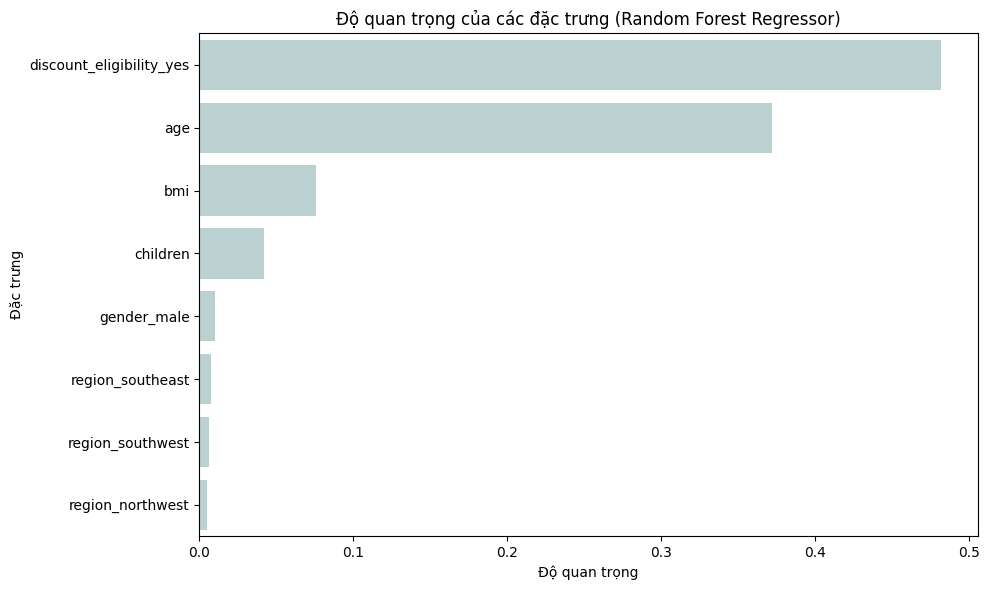


--- Phân tích Phần dư (Residual Analysis) ---


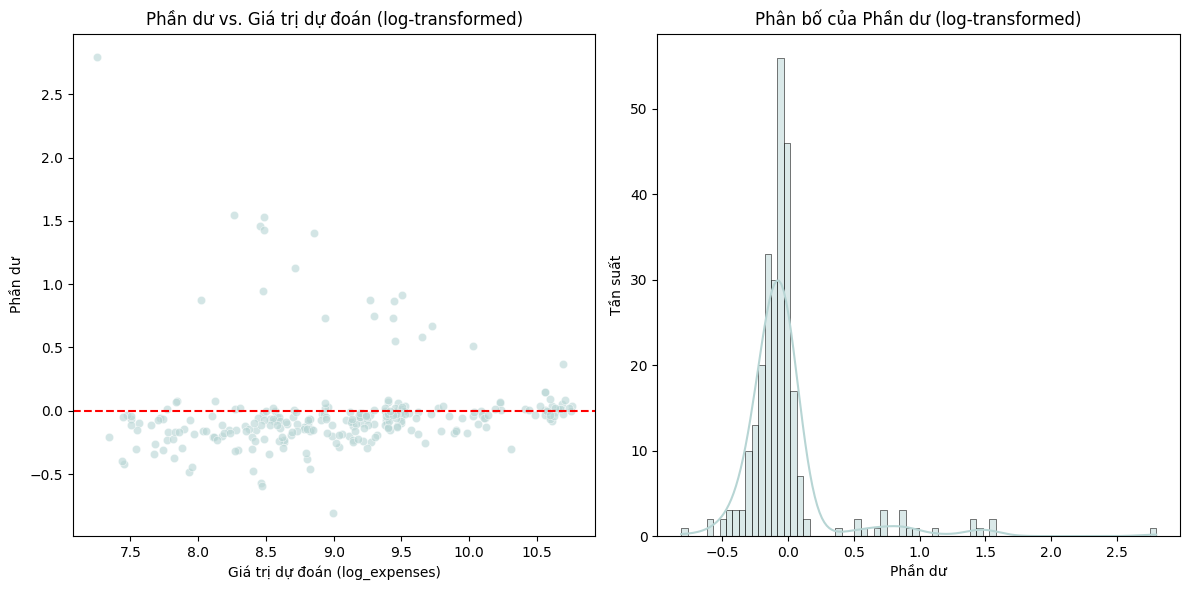


--- Lưu mô hình tốt nhất ---
Mô hình Random Forest tốt nhất đã được lưu vào 'best_random_forest_model.pkl'


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib # Để lưu và tải mô hình

# Giả sử X_train, X_test, y_train, y_test và best_rf_model đã được tạo từ các bước trước.
# Nếu bạn vừa khởi động lại kernel hoặc chưa chạy, hãy đảm bảo các biến này đã được tạo lại
# bằng cách chạy lại toàn bộ khối code từ các bước tiền xử lý, chia dữ liệu và tinh chỉnh mô hình.

# Dữ liệu mẫu (nếu chưa có trong môi trường hiện tại)
try:
    if 'X_train' not in locals() or 'best_rf_model' not in locals():
        print("Đang tải lại dữ liệu và huấn luyện lại mô hình tốt nhất...")
        data = pd.read_csv('health_insurance.csv')
        data_encoded = pd.get_dummies(data, columns=['gender', 'discount_eligibility', 'region'], drop_first=True)
        data_encoded['log_expenses'] = np.log(data_encoded['expenses'])
        data_encoded['log_premium'] = np.log(data_encoded['premium'])
        X = data_encoded.drop(columns=['expenses', 'premium', 'log_expenses', 'log_premium'])
        y = data_encoded['log_expenses']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

        # Huấn luyện lại mô hình với các tham số tốt nhất đã tìm được
        # Siêu tham số tốt nhất: {'max_depth': 10, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
        best_rf_model = RandomForestRegressor(n_estimators=200, max_features=0.6, max_depth=10,
                                              min_samples_leaf=2, min_samples_split=5, random_state=42)
        best_rf_model.fit(X_train, y_train)
        print("Đã tải lại dữ liệu và huấn luyện lại mô hình Random Forest tốt nhất.")
except Exception as e:
    print(f"Lỗi khi tải lại dữ liệu và/hoặc huấn luyện mô hình: {e}")
    print("Vui lòng đảm bảo file 'health_insurance.csv' có sẵn và các bước trước đã chạy đúng.")


print("\n--- Phân tích độ quan trọng của đặc trưng (Feature Importance) ---")

# Lấy độ quan trọng của các đặc trưng từ mô hình Random Forest
feature_importances = best_rf_model.feature_importances_

# Tạo DataFrame để dễ hình dung
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sắp xếp theo độ quan trọng giảm dần
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)

# Trực quan hóa độ quan trọng của đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Độ quan trọng của các đặc trưng (Random Forest Regressor)')
plt.xlabel('Độ quan trọng')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.show()

# --- Bước tiếp theo: Phân tích phần dư ---
print("\n--- Phân tích Phần dư (Residual Analysis) ---")

# Dự đoán trên tập kiểm tra
y_pred_test = best_rf_model.predict(X_test)

# Tính toán phần dư (residuals)
residuals = y_test - y_pred_test

# Biểu đồ phân tán của phần dư vs. giá trị dự đoán
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Phần dư vs. Giá trị dự đoán (log-transformed)')
plt.xlabel('Giá trị dự đoán (log_expenses)')
plt.ylabel('Phần dư')

# Biểu đồ phân bố của phần dư
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Phân bố của Phần dư (log-transformed)')
plt.xlabel('Phần dư')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()

# --- Bước cuối cùng: Lưu mô hình ---
print("\n--- Lưu mô hình tốt nhất ---")
try:
    joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
    print("Mô hình Random Forest tốt nhất đã được lưu vào 'best_random_forest_model.pkl'")
except Exception as e:
    print(f"Lỗi khi lưu mô hình: {e}")

本プロジェクトでは、Random Forest Regressorを用いて医療保険費用を高精度に予測する強力な機械学習モデルの構築に成功しました（元データに対する決定係数R²は約0.878）。詳細な分析により、保険費用に影響を与える主要な要因について貴重なインサイトが得られました。特に、「割引適格」の状態（おそらく喫煙の有無を示す）と年齢との強い関連性が明らかになっています。